<a href="https://colab.research.google.com/github/hammadnajeeb123/TechWithWarrior_NLP-internship/blob/main/Perform_text_classification_using_a_bag_of_words_model_and_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
from sklearn.datasets import fetch_20newsgroups
import pandas as pd

In [2]:
# Fetch the training data
newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))

In [3]:
# Display a few samples
print("Sample training data:\n", newsgroups_train.data[:2])
print("Corresponding target labels:\n", newsgroups_train.target[:2])

Sample training data:
 ['I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.', "A fair number of brave souls who upgraded their SI clock oscillator have\nshared their experiences for this poll. Please send a brief message detailing\nyour experiences with the procedure. Top speed attained, CPU rated speed,\nadd on cards and adapters, heat sinks, hour of usage per day, floppy disk\nfunctionality with 800 and 1.4 m floppies are especially requested.\n\nI will be summarizing in the next two days, so please add to the network\nknowledge base if you have done the clock 

In [4]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
# Initialize the vectorizer
vectorizer = CountVectorizer(stop_words='english')


In [6]:
# Fit and transform the training data to a bag-of-words representation
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)

In [7]:
# Display the shape of the resulting vectors
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (11314, 101322)
Testing data shape: (7532, 101322)


In [8]:
# Import the Multinomial Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB

In [9]:
# Initialize the classifier
clf = MultinomialNB()

In [10]:
# Train the model on the training data
clf.fit(X_train, newsgroups_train.target)

MultinomialNB()

In [11]:
# Predict on the test data
y_pred = clf.predict(X_test)

In [12]:
# Import evaluation metrics
from sklearn.metrics import accuracy_score, classification_report

In [13]:
# Calculate accuracy
accuracy = accuracy_score(newsgroups_test.target, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 63.44%


In [14]:
# Print classification report
print("Classification Report:\n")
print(classification_report(newsgroups_test.target, y_pred, target_names=newsgroups_test.target_names))

Classification Report:

                          precision    recall  f1-score   support

             alt.atheism       0.65      0.30      0.41       319
           comp.graphics       0.58      0.69      0.63       389
 comp.os.ms-windows.misc       0.40      0.01      0.01       394
comp.sys.ibm.pc.hardware       0.53      0.72      0.61       392
   comp.sys.mac.hardware       0.74      0.56      0.64       385
          comp.windows.x       0.56      0.81      0.66       395
            misc.forsale       0.85      0.69      0.76       390
               rec.autos       0.82      0.70      0.76       396
         rec.motorcycles       0.91      0.62      0.73       398
      rec.sport.baseball       0.94      0.74      0.83       397
        rec.sport.hockey       0.58      0.91      0.71       399
               sci.crypt       0.54      0.79      0.64       396
         sci.electronics       0.71      0.49      0.58       393
                 sci.med       0.81      0.79      

<ipython-input-15-a6f12298b734>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


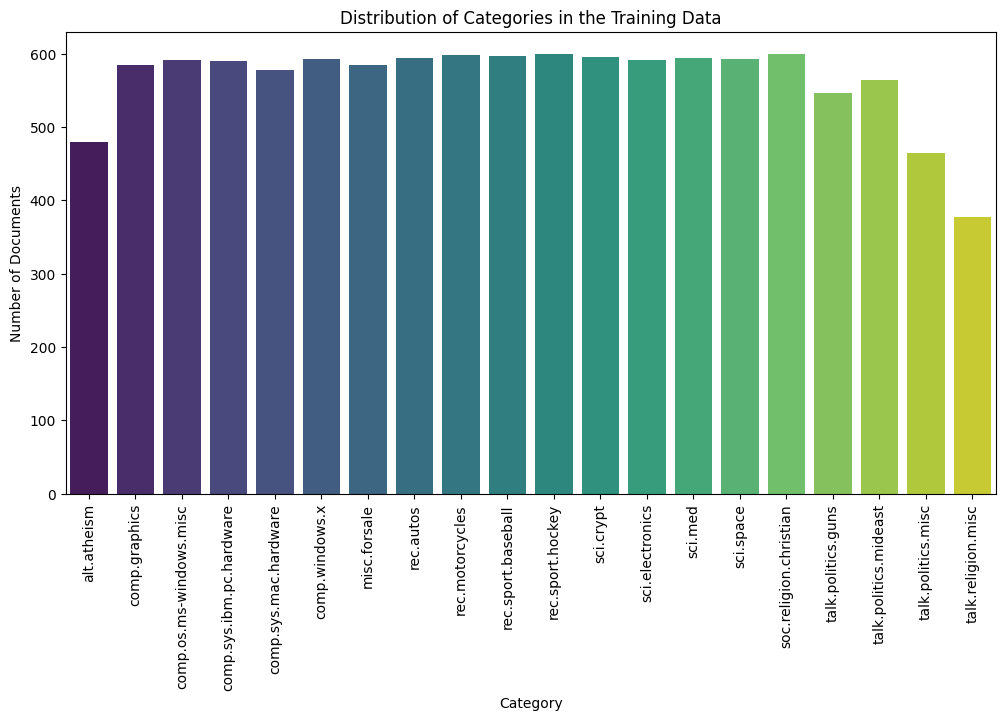

In [15]:
# Import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for visualization
df_train = pd.DataFrame({'Text': newsgroups_train.data, 'Category': newsgroups_train.target})
df_test = pd.DataFrame({'Text': newsgroups_test.data, 'Category': newsgroups_test.target})

# Count the number of documents per category
category_counts = df_train['Category'].value_counts()

# Plot the distribution of categories
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Distribution of Categories in the Training Data')
plt.xlabel('Category')
plt.ylabel('Number of Documents')
plt.xticks(ticks=range(len(newsgroups_train.target_names)), labels=newsgroups_train.target_names, rotation=90)
plt.show()


In [16]:
# Import additional preprocessing libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
import re
import nltk

In [17]:
# Download necessary NLTK data
nltk.download('stopwords')

# Initialize stemmer
stemmer = SnowballStemmer("english")
stop_words = set(stopwords.words('english'))

# Define a text preprocessing function
def preprocess_text(text):
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize and stem
    tokens = [stemmer.stem(word) for word in text.lower().split() if word not in stop_words]
    # Join back the tokens into a single string
    return ' '.join(tokens)

# Apply the preprocessing function to the data
df_train['Processed_Text'] = df_train['Text'].apply(preprocess_text)
df_test['Processed_Text'] = df_test['Text'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [18]:
# Display a few examples of the preprocessed text
df_train[['Text', 'Processed_Text']].head()

,Text,Processed_Text
0,I was wondering if anyone out there could enli...,wonder anyon could enlighten car saw day door ...
1,A fair number of brave souls who upgraded thei...,fair number brave soul upgrad si clock oscil s...
2,"well folks, my mac plus finally gave up the gh...",well folk mac plus final gave ghost weekend st...
3,\nDo you have Weitek's address/phone number? ...,weitek addressphon number id like get inform chip
4,"From article <C5owCB.n3p@world.std.com>, by to...",articl cowcbnpworldstdcom tombakerworldstdcom ...


In [19]:
# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Fit and transform the training data to a TF-IDF representation
X_train_tfidf = tfidf_vectorizer.fit_transform(df_train['Processed_Text'])
X_test_tfidf = tfidf_vectorizer.transform(df_test['Processed_Text'])

# Display the shape of the resulting vectors
print(f"TF-IDF Training data shape: {X_train_tfidf.shape}")
print(f"TF-IDF Testing data shape: {X_test_tfidf.shape}")


TF-IDF Training data shape: (11314, 5000)
TF-IDF Testing data shape: (7532, 5000)


In [20]:
# Import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Initialize classifiers
models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Machine': SVC(kernel='linear')
}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_tfidf, df_train['Category'])
    # Predict on the test set
    y_pred = model.predict(X_test_tfidf)
    # Calculate accuracy
    accuracy = accuracy_score(df_test['Category'], y_pred)
    print(f"{model_name} Accuracy: {accuracy * 100:.2f}%")


Naive Bayes Accuracy: 66.21%
Logistic Regression Accuracy: 65.64%
Support Vector Machine Accuracy: 63.44%


Hyperparameter Tuning with Grid Search
We will use Grid Search to find the best parameters for Logistic Regression.


In [21]:
# Import Grid Search
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Logistic Regression
param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l2']
}

# Initialize Grid Search
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_tfidf, df_train['Category'])

# Best parameters and score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")


Best Parameters: {'C': 1, 'penalty': 'l2'}
Best Score: 0.7104472322797097


 Confusion Matrix Analysis
Let's visualize the confusion matrix for the best-performing model.

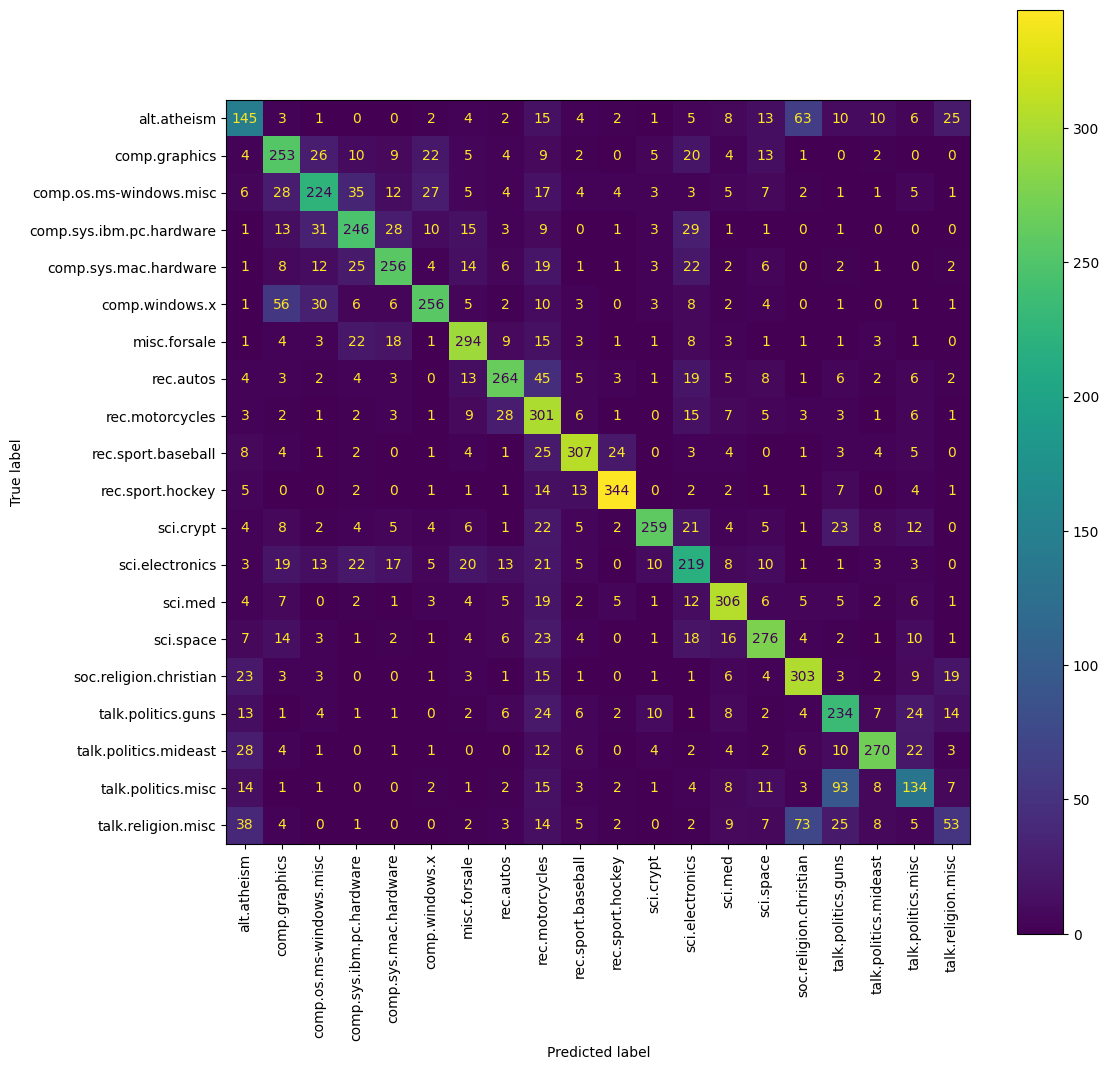

In [23]:
# Import confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt # Make sure to import pyplot

# ... (rest of your code)

# Create figure and axes with desired figsize
fig, ax = plt.subplots(figsize=(12, 12))

# Confusion matrix
cm = confusion_matrix(df_test['Category'], y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=newsgroups_test.target_names)

# Plot on the created axes
disp.plot(ax=ax, cmap='viridis') # Pass ax to disp.plot()

plt.xticks(rotation=90)
plt.show()

 Model Deployment
Save the best model and show how to use it for predictions.

In [24]:
import joblib

# Save the model
joblib.dump(best_model, 'best_text_classification_model.pkl')

# Load and use the model
loaded_model = joblib.load('best_text_classification_model.pkl')
sample_text = "This is a sample document talking about space and NASA."
processed_sample_text = preprocess_text(sample_text)
sample_vector = tfidf_vectorizer.transform([processed_sample_text])
predicted_category = loaded_model.predict(sample_vector)

# Display the predicted category
print(f"Predicted Category: {newsgroups_test.target_names[predicted_category[0]]}")


Predicted Category: sci.space
